In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [12]:
# move to root directory
while os.path.basename(os.getcwd()) != "reward-network-iii":
    os.chdir("..")

In [13]:
files = [
    'data/24_02_04/model/mode_nodes_more_steps_0.csv',
    'data/24_02_04/model/mode_nodes_more_steps_1.csv',
    'data/24_02_04/model/mode_nodes_more_steps_2.csv',
]

dfs = []
for s, file in enumerate(files):
    df = pd.read_csv(file)
    df['seed'] = s
    dfs.append(df)
df = pd.concat(dfs)

In [14]:
df[['average reward', 'average level']] = df[['test_avg_reward_all_envs', 'test_avg_level_all_envs']]

In [15]:
df = df[['episode', 'seed', 'average reward', 'average level']]

df['time'] = df['episode'] * 310 / 5000

df = df.dropna()
df['seed'] = df['seed'].astype(str)

In [16]:
df_myopic = pd.read_json('data/23_11_30/solution_test__myopic.json')
df_random = pd.read_json('data/23_11_30/solution_test__random.json')
df_take_loss = pd.read_json('data/23_11_30/solution_test__take_loss.json')


ref_max_level = {
    'myopic': df_myopic['max_level'].mean(),
    'random': df_random['max_level'].mean(),
    'take_loss': df_take_loss['max_level'].mean(),
}
ref_total_reward = {
    'myopic': df_myopic['total_reward'].mean(),
    'random': df_random['total_reward'].mean(),
    'take_loss': df_take_loss['total_reward'].mean(),
}

In [17]:
# smooth the data group by seed
df = df.groupby('seed').rolling(10, center=True).mean().reset_index()
df = df.dropna()

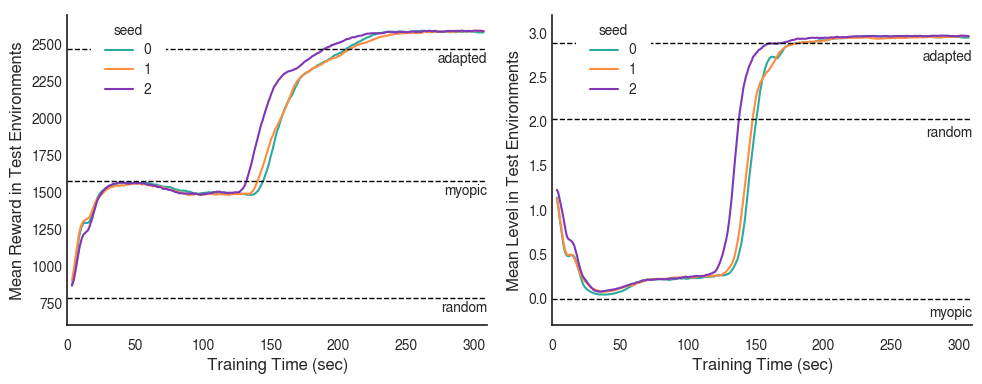

In [54]:
fig = plt.figure(figsize=(10, 4))


axes = fig.subplots(1, 2)

sns.set_theme(style='white', rc={'font.family': 'serif', 'font.serif': ['Times New Roman', 'FreeSans']})


# custom_palette = ['#1b9e77', '#d95f02', '#7570b3']
custom_palette = ['#2BAA9D', '#FF8C41', '#7F37B6', ]


ax = axes[0]

sns.lineplot(data=df, x="time", y="average reward", hue="seed", palette=custom_palette, ax=ax)

legend = ax.legend(frameon=True, fontsize=10, title='seed', title_fontsize=10, loc='upper left', bbox_to_anchor=(0.04, 1.04), facecolor='white', borderpad=1, labelspacing=0.4)
legend.get_frame().set_alpha(1)
legend.get_frame().set_edgecolor('none')

ax.axhline(ref_total_reward['myopic'], ls='--', label='myopic', color='black', lw=1)
ax.text(310, ref_total_reward['myopic'] - 20, 'myopic', ha='right', va='top', fontsize=10)
ax.axhline(ref_total_reward['random'], ls='--', label='random', color='black', lw=1)
ax.text(310, ref_total_reward['random'] - 20, 'random', ha='right', va='top', fontsize=10)
ax.axhline(ref_total_reward['take_loss'], ls='--', label='take loss', color='black', lw=1)
ax.text(310, ref_total_reward['take_loss'] - 20, 'adapted', ha='right', va='top', fontsize=10)

ax.set_ylim(600, 2700)
ax.set_xlim(0, 310)


# ax.set_xticklabels([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlabel('Training Time (sec)', fontsize=12)
ax.set_ylabel('Mean Reward in Test Environments', fontsize=12)

# Adjust the position of the y-axis tick labels
pad_distance = - 0.02  # Adjust this value as needed for spacing
for label in ax.get_yticklabels():
    label.set_horizontalalignment('right')
    label.set_x(label.get_position()[0] - pad_distance)

ax = axes[1]

sns.lineplot(data=df, x="time", y="average level", hue="seed", ax=ax, palette=custom_palette)

legend = ax.legend(frameon=True, fontsize=10, title='seed', title_fontsize=10, loc='upper left', bbox_to_anchor=(0.04, 1.04), facecolor='white', borderpad=1, labelspacing=0.4)
legend.get_frame().set_alpha(1)
legend.get_frame().set_edgecolor('none')

ax.axhline(ref_max_level['myopic'], ls='--', label='myopic', color='black', lw=1)
ax.text(310, ref_max_level['myopic'] - 0.08, 'myopic', ha='right', va='top', fontsize=10)
ax.axhline(ref_max_level['random'], ls='--', label='random', color='black', lw=1)
ax.text(310, ref_max_level['random'] - 0.08, 'random', ha='right', va='top', fontsize=10)
ax.axhline(ref_max_level['take_loss'], ls='--', label='take loss', color='black', lw=1)
ax.text(310, ref_max_level['take_loss'] - 0.08, 'adapted', ha='right', va='top', fontsize=10)


ax.set_ylim(-.3, 3.2)
ax.set_xlim(0, 310)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlabel('Training Time (sec)', fontsize=12)
ax.set_ylabel('Mean Level in Test Environments', fontsize=12)

# Adjust the position of the y-axis tick labels
pad_distance = - 0.02  # Adjust this value as needed for spacing
for label in ax.get_yticklabels():
    label.set_horizontalalignment('right')
    label.set_x(label.get_position()[0] - pad_distance)


folder = os.path.join('analysis','plots', 'algorithm')

os.makedirs(folder, exist_ok=True)

png_filename = os.path.join(folder,'algorithm.png')
pdf_filename = os.path.join(folder,'algorithm.pdf')

plt.tight_layout()
# fig.subplots_adjust(top=0.98, right=0.99)
plt.savefig(png_filename, dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.savefig(pdf_filename, bbox_inches='tight', pad_inches=0.1)

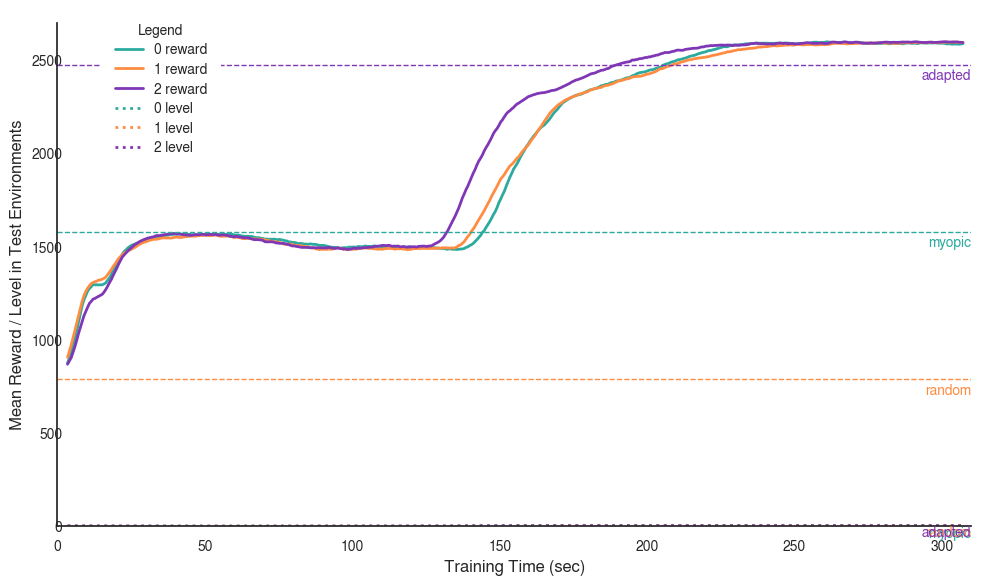

In [55]:
i


In [43]:
ref_max_level

{'myopic': 0.0, 'random': 2.031, 'take_loss': 2.885}

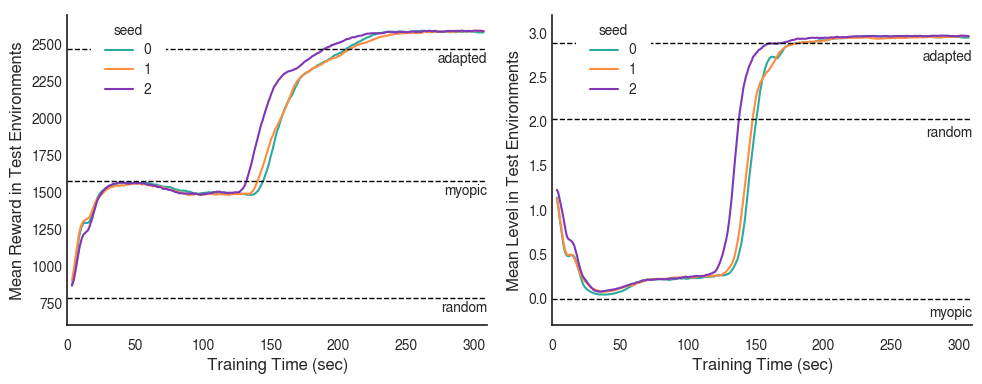

In [57]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.set_theme(style='white', rc={'font.family': 'serif', 'font.serif': ['Times New Roman', 'FreeSans']})
custom_palette = ['#2BAA9D', '#FF8C41', '#7F37B6']

lines_info = [
    ('myopic', 'myopic'),
    ('random', 'random'),
    ('take_loss', 'adapted')
]

graphs_info = [
    ("average reward", 'Mean Reward in Test Environments', ref_total_reward, [600, 2700], axes[0], 20),
    ("average level", 'Mean Level in Test Environments', ref_max_level, [-.3, 3.2], axes[1], 0.08)
]

for y_col, y_label, ref_values, y_limits, ax, y_offset in graphs_info:
    sns.lineplot(data=df, x="time", y=y_col, hue="seed", palette=custom_palette, ax=ax)
    legend = ax.legend(frameon=True, fontsize=10, title='seed', title_fontsize=10, loc='upper left', 
                       bbox_to_anchor=(0.04, 1.04), facecolor='white', borderpad=1, labelspacing=0.4)
    legend.get_frame().set_alpha(1)
    legend.get_frame().set_edgecolor('none')
    
    for line_name, label_name in lines_info:
        ax.axhline(ref_values[line_name], ls='--', color='black', lw=1)
        ax.text(310, ref_values[line_name] - y_offset, label_name, ha='right', va='top', fontsize=10)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xlabel('Training Time (sec)', fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_ylim(*y_limits)
    ax.set_xlim(0, 310)
    
    pad_distance = -0.02
    for label in ax.get_yticklabels():
        label.set_horizontalalignment('right')
        label.set_x(label.get_position()[0] - pad_distance)

# Create folder and save figures
folder = os.path.join('analysis', 'plots', 'algorithm')
os.makedirs(folder, exist_ok=True)
png_filename = os.path.join(folder, 'algorithm.png')
pdf_filename = os.path.join(folder, 'algorithm.pdf')

plt.tight_layout()
plt.savefig(png_filename, dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.savefig(pdf_filename, bbox_inches='tight', pad_inches=0.1)


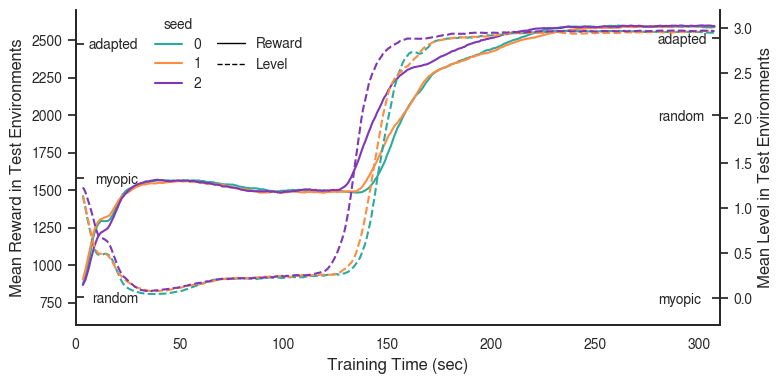

In [79]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

fig, ax1 = plt.subplots(figsize=(8, 4))

sns.set_theme(style='white', rc={'font.family': 'serif', 'font.serif': ['Times New Roman', 'FreeSans']})
custom_palette = ['#2BAA9D', '#FF8C41', '#7F37B6']

lines_info = [
    ('myopic', 'myopic'),
    ('random', 'random'),
    ('take_loss', 'adapted')
]

# Plot for rewards
ax1.set_xlabel('Training Time (sec)', fontsize=12)
ax1.set_ylabel('Mean Reward in Test Environments', fontsize=12)
ax1.set_ylim(600, 2700)
ax1.set_xlim(0, 310)
sns.lineplot(data=df, x="time", y="average reward", hue="seed", palette=custom_palette, ax=ax1, linestyle='-')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=10)
pad_distance = 0
for label in ax1.get_yticklabels():
    label.set_horizontalalignment('right')
    label.set_x(label.get_position()[0] - pad_distance)

# Second y-axis for levels
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Level in Test Environments', fontsize=12)
ax2.set_ylim(-.3, 3.2)
sns.lineplot(data=df, x="time", y="average level", hue="seed", palette=custom_palette, ax=ax2, linestyle='--', legend=None)

ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis='both', which='major', labelsize=10)
for label in ax2.get_yticklabels():
    label.set_horizontalalignment('left')
    label.set_x(label.get_position()[0] + pad_distance)

# Adding specific labels as secondary y-axis ticks for rewards
secax1 = ax1.secondary_yaxis('left')
secax1.set_yticks([ref_total_reward[line[0]] for line in lines_info])
secax1.set_yticklabels([line[1] for line in lines_info])
secax1.tick_params(axis='y', direction='in', pad=-45, labelsize=10)

# Adding specific labels as secondary y-axis ticks for levels
secax2 = ax2.secondary_yaxis('right')
secax2.set_yticks([ref_max_level[line[0]] for line in lines_info])
secax2.set_yticklabels([line[1] for line in lines_info])
secax2.tick_params(axis='y', direction='in', pad=-45, labelsize=10)

legend1 = ax1.legend(frameon=True, fontsize=10, title='seed', title_fontsize=10, loc='upper left', 
                     bbox_to_anchor=(0.09, 1.04), facecolor='white', borderpad=1, labelspacing=0.4)
legend1.get_frame().set_alpha(1)
legend1.get_frame().set_edgecolor('none')

# Create custom legend for line styles
custom_lines = [Line2D([0], [0], color='black', lw=1, linestyle='-'),
                Line2D([0], [0], color='black', lw=1, linestyle='--')]

line_style_legend = ax1.legend(custom_lines, ['Reward', 'Level'], loc='upper left', bbox_to_anchor=(0.20, 0.955), frameon=False, fontsize=10, title_fontsize=10)

# Add the first legend back to the plot
ax1.add_artist(legend1)

# Create folder and save figures
folder = os.path.join('analysis', 'plots', 'algorithm')
os.makedirs(folder, exist_ok=True)
png_filename = os.path.join(folder, 'algorithm.png')
pdf_filename = os.path.join(folder, 'algorithm.pdf')

plt.tight_layout()
plt.savefig(png_filename, dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.savefig(pdf_filename, bbox_inches='tight', pad_inches=0.1)
